In [1]:
import glob
import json
import pandas as pd

# Define the path to the folder containing our JSON files
path_to_json = '/Users/nely/Desktop/TinyML/Project/*.json'  # Adjust as needed

# Initialize an empty list to store all the stroke data
all_strokes = []

# Loop through the found files
for file_name in glob.glob(path_to_json):
    print(f"Processing file: {file_name}")  # Print the file name being processed
    with open(file_name, 'r') as file:
        data = json.load(file)
        # Check if the data is in the expected format (i.e if contains 'strokes' key)
        if 'strokes' in data:
            strokes = data['strokes']
            for stroke in strokes:
                stroke['filename'] = file_name  # Add filename to each stroke record
                all_strokes.append(stroke)
        else:
            print(f"Unexpected data format in {file_name}")

# Convert the list of strokes to a DataFrame
df = pd.DataFrame(all_strokes)

# Display the first few rows to understand what the data looks like
print(df.head())

# Analyze the distribution of labels if 'label' is a key in the dictionary
if 'label' in df.columns:
    label_counts = df['label'].value_counts()
    print("Label Distribution:")
    print(label_counts)

# Display total number of examples
print(f"Total number of examples: {len(df)}")

# Save the combined data to a new JSON file
df.to_json('/Users/nely/Desktop/TinyML/Project/combined_gesture_data.json', orient='records')

print("Entries from nelyromo.json:", df[df['filename'].str.contains("nelyromo.json")].shape[0])
print("Entries from nelyromo2.json:", df[df['filename'].str.contains("nelyromo2.json")].shape[0])



Processing file: /Users/nely/Desktop/TinyML/Project/combined_gesture_data.json
Unexpected data format in /Users/nely/Desktop/TinyML/Project/combined_gesture_data.json
Processing file: /Users/nely/Desktop/TinyML/Project/linday_50each.json
Processing file: /Users/nely/Desktop/TinyML/Project/linday_50each2.json
Processing file: /Users/nely/Desktop/TinyML/Project/nelyromo2.json
Processing file: /Users/nely/Desktop/TinyML/Project/nelyromo.json
   index                                       strokePoints label  \
0      0  [{'x': -0.1171875, 'y': -0.3359375}, {'x': -0....     0   
1      1  [{'x': -0.0546875, 'y': -0.203125}, {'x': -0.0...     0   
2      2  [{'x': -0.0546875, 'y': -0.2265625}, {'x': -0....     0   
3      3  [{'x': -0.1875, 'y': -0.25}, {'x': -0.1875, 'y...     0   
4      4  [{'x': 0.03125, 'y': -0.171875}, {'x': 0.03125...     0   

                                            filename  
0  /Users/nely/Desktop/TinyML/Project/linday_50ea...  
1  /Users/nely/Desktop/TinyML/Pr

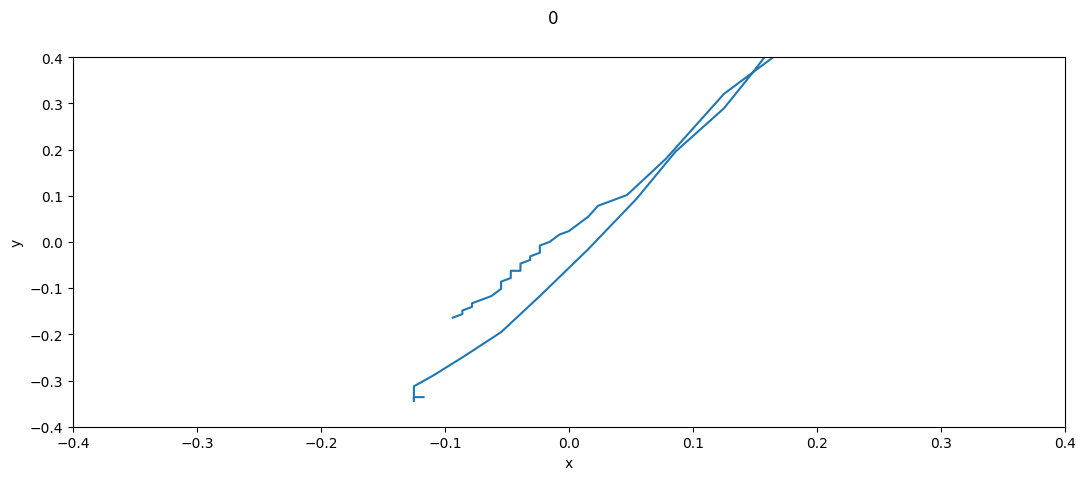

In [2]:
import glob
import json
from pathlib import Path

import matplotlib.pyplot as plt

def plot_stroke(stroke):
    x_array = [coords["x"] for coords in stroke["strokePoints"]]
    y_array = [coords["y"] for coords in stroke["strokePoints"]]

    fig = plt.figure(figsize=(12.8, 4.8))
    fig.suptitle(stroke["label"])

    ax = fig.add_subplot(111)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-0.4, 0.4)
    ax.set_ylim(-0.4, 0.4)
    ax.plot(x_array, y_array)

    plt.show()

path_to_json = '/Users/nely/Desktop/TinyML/Project/*.json'
json_files = glob.glob(path_to_json)

strokes = []
for filename in json_files:
    with open(filename, "r") as file:
        file_contents = file.read()
    file_data = json.loads(file_contents)
    for stroke in file_data:
        # Store each stroke along with its filename in a dictionary
        strokes.append({"stroke": stroke, "filename": filename})

# Example usage of plot_stroke function with the first stroke
if strokes:
    plot_stroke(strokes[0]["stroke"])
else:
    print("No strokes found.")


In [3]:
if strokes and len(strokes) > 11:
    print("Stroke content:", strokes[11]["stroke"])
else:
    print("No stroke found or stroke index out of range.")


Stroke content: {'index': 14, 'strokePoints': [{'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.3515625}, {'x': -0.140625, 'y': -0.3515625}, {'x': -0.140625, 'y': -0.3515625}, {'x': -0.140625, 'y': -0.3515625}, {'x': -0.140625, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.359375}, {'x': -0.15625, 'y': -0.3515625}, {'x': -0.15625, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.34375}, {'x': -0.1328125, 'y': -0.3203125}, {'x': -0.109375, 'y': -0.2734375}, {'x': -0.078125, 'y': -0.1953125}, {'x': -0.046875

In [4]:
# Assuming you have the 'strokes' variable loaded as before
gesture_data = strokes[11]["stroke"]

# Print the type of gesture_data to understand its structure
print(type(gesture_data))

# If it's a dictionary, print its keys
if isinstance(gesture_data, dict):
    print(gesture_data.keys())

# If it's small enough, you can also print the entire content to see the structure
print(gesture_data)


<class 'dict'>
dict_keys(['index', 'strokePoints', 'label', 'filename'])
{'index': 14, 'strokePoints': [{'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.359375}, {'x': -0.140625, 'y': -0.3515625}, {'x': -0.140625, 'y': -0.3515625}, {'x': -0.140625, 'y': -0.3515625}, {'x': -0.140625, 'y': -0.3515625}, {'x': -0.140625, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.359375}, {'x': -0.15625, 'y': -0.3515625}, {'x': -0.15625, 'y': -0.3515625}, {'x': -0.1484375, 'y': -0.34375}, {'x': -0.1328125, 'y': -0.3203125}, {'x': -0.109375, 'y': -0.273

In [5]:
import glob
import json
import pandas as pd
import numpy as np
import PIL.Image
import math
import os
import matplotlib.pyplot as plt

def draw_circle(buffer, center_x, center_y, radius, color, width, height, num_channels):
    """Draws a filled circle onto the buffer."""
    for angle in range(360):
        rad = math.radians(angle)
        x = int(center_x + radius * math.cos(rad))
        y = int(center_y + radius * math.sin(rad))
        if 0 <= x < width and 0 <= y < height:
            buffer_index = (y * width + x) * num_channels
            buffer[buffer_index:buffer_index + num_channels] = bytearray(color)
    print("Circle drawn.")


def normalize_points(gesture, width, height, margin_percent=5):
    """Normalize points to be between 0 and 1 based on actual min and max, then scale by image dimensions with margins."""
    print("Normalizing points...")
    if not gesture:
        print("Empty gesture data received.")
        return []

    # Calculate the margin in pixels
    margin_width = width * (margin_percent / 100) / 2
    margin_height = height * (margin_percent / 100) / 2

    all_x = [point['x'] for point in gesture]
    all_y = [point['y'] for point in gesture]
    min_x, max_x = min(all_x), max(all_x)
    min_y, max_y = min(all_y), max(all_y)

    normalized_gesture = []
    for point in gesture:
        # Normalize points to range from 0 to 1
        normalized_x = (point['x'] - min_x) / (max_x - min_x) if max_x - min_x > 0 else 0.5
        normalized_y = (point['y'] - min_y) / (max_y - min_y) if max_y - min_y > 0 else 0.5
        
        # Apply the margin and scale to the new dimension
        normalized_x = margin_width + normalized_x * (width - 2 * margin_width)
        normalized_y = margin_height + normalized_y * (height - 2 * margin_height)
        
        normalized_gesture.append({"x": normalized_x, "y": normalized_y})
    
    return normalized_gesture



def rasterize_gesture(gesture, label, width, height):
    """Converts a gesture into a rasterized image based on its label."""
    print(f"Rasterizing gesture for label: {label}")
    num_channels = 3
    buffer_byte_count = height * width * num_channels
    buffer = bytearray(buffer_byte_count)
    colors = {
        0: [255, 0, 0],  # Swipe Up
        1: [0, 255, 0],  # Swipe Down
        2: [0, 0, 255],  # Hand Wave
        3: [255, 255, 0],  # Clockwise
        4: [255, 0, 255]  # Counterclockwise
    }
    try:
        label_key = int(label)  # Attempt to convert label to an integer
        color = colors.get(label_key, [255, 255, 255])  # Default to white if no match found
    except ValueError:
        print(f"Warning: Label '{label}' could not be converted to an integer.")
        color = [255, 255, 255]  # Use default white color if conversion fails

    print(f"Using color: {color} for label: {label}")
    gesture = normalize_points(gesture, width, height)

    
    if label in ["clockwise", "counterclockwise"]:
        center_x = width // 2
        center_y = height // 2
        radius = min(width, height) // 4
        draw_circle(buffer, center_x, center_y, radius, color, width, height, num_channels)
    else:
        for point_index in range(len(gesture) - 1):
            start_point = gesture[point_index]
            end_point = gesture[point_index + 1]
            start_x, start_y = int(start_point["x"]), int(start_point["y"])
            end_x, end_y = int(end_point["x"]), int(end_point["y"])
            dx = abs(end_x - start_x)
            dy = abs(end_y - start_y)
            sx = 1 if start_x < end_x else -1
            sy = 1 if start_y < end_y else -1
            err = dx - dy
            while start_x != end_x or start_y != end_y:
                if 0 <= start_x < width and 0 <= start_y < height:
                    buffer_index = (start_y * width + start_x) * num_channels
                    buffer[buffer_index:buffer_index + num_channels] = bytearray(color)
                e2 = 2 * err
                if e2 > -dy:
                    err -= dy
                    start_x += sx
                if e2 < dx:
                    err += dx
                    start_y += sy
    
    np_buffer = np.frombuffer(buffer, dtype=np.uint8).reshape(height, width, num_channels)
    return np_buffer

# Load JSON data into DataFrame
path_to_json = '/Users/nely/Desktop/TinyML/Project/*.json'
all_strokes = []
for file_name in glob.glob(path_to_json):
    with open(file_name, 'r') as file:
        data = json.load(file)
        if 'strokes' in data:
            for stroke in data['strokes']:
                stroke['filename'] = file_name
                all_strokes.append(stroke)

df = pd.DataFrame(all_strokes)
print("Data loaded:", df.head())
print(f"Total gestures: {len(df)}")

# Create directory for output images
output_dir = '/Users/nely/Desktop/TinyML/Project/Output/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Test rasterization on loaded data and save images
for index, row in df.iterrows():
    gesture = row['strokePoints']
    if gesture:
        print("Processing gesture:", gesture)
        label = row['label'].lower()
        file_path = os.path.join(output_dir, f"{label}_{index}.png")
        raster = rasterize_gesture(gesture, label, 64, 64)
        if raster is not None:
            image = PIL.Image.fromarray(raster).resize((512, 512), PIL.Image.NEAREST)
            image.save(file_path)
            print(f"Image saved at {file_path}")
        else:
            print(f"Rasterization of gesture {label} did not return an image.")
    else:
        print(f"No gesture data available for index {index}")


Data loaded:    index                                       strokePoints label  \
0      0  [{'x': -0.1171875, 'y': -0.3359375}, {'x': -0....     0   
1      1  [{'x': -0.0546875, 'y': -0.203125}, {'x': -0.0...     0   
2      2  [{'x': -0.0546875, 'y': -0.2265625}, {'x': -0....     0   
3      3  [{'x': -0.1875, 'y': -0.25}, {'x': -0.1875, 'y...     0   
4      4  [{'x': 0.03125, 'y': -0.171875}, {'x': 0.03125...     0   

                                            filename  
0  /Users/nely/Desktop/TinyML/Project/linday_50ea...  
1  /Users/nely/Desktop/TinyML/Project/linday_50ea...  
2  /Users/nely/Desktop/TinyML/Project/linday_50ea...  
3  /Users/nely/Desktop/TinyML/Project/linday_50ea...  
4  /Users/nely/Desktop/TinyML/Project/linday_50ea...  
Total gestures: 1456
Processing gesture: [{'x': -0.1171875, 'y': -0.3359375}, {'x': -0.1171875, 'y': -0.3359375}, {'x': -0.1171875, 'y': -0.3359375}, {'x': -0.1171875, 'y': -0.3359375}, {'x': -0.1171875, 'y': -0.3359375}, {'x': -0.125, 'y': -

Label: 2


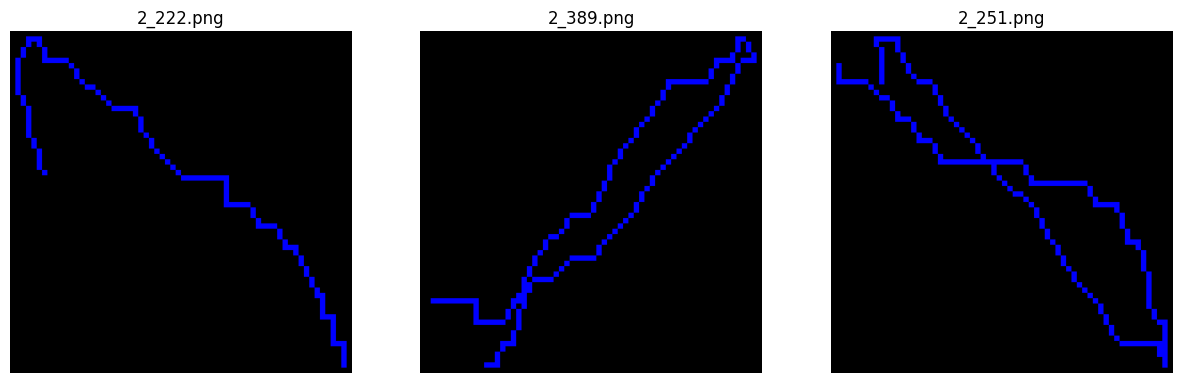

Label: 0


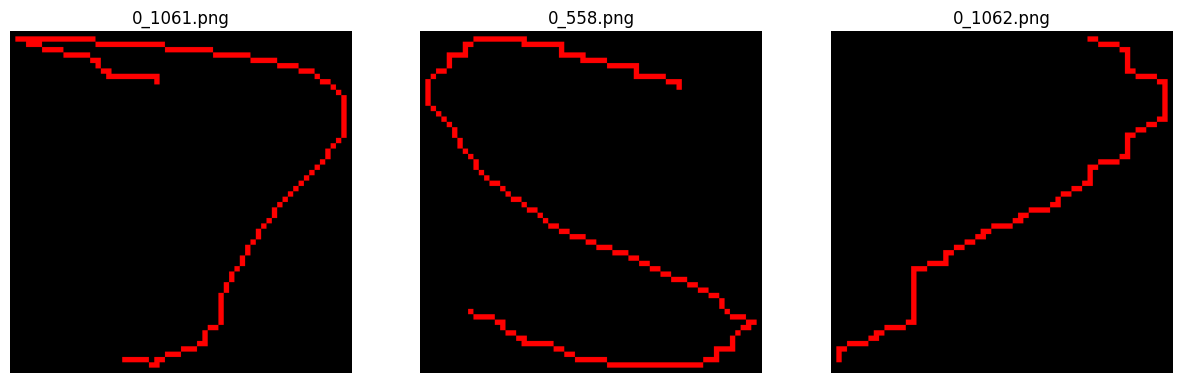

Label: 


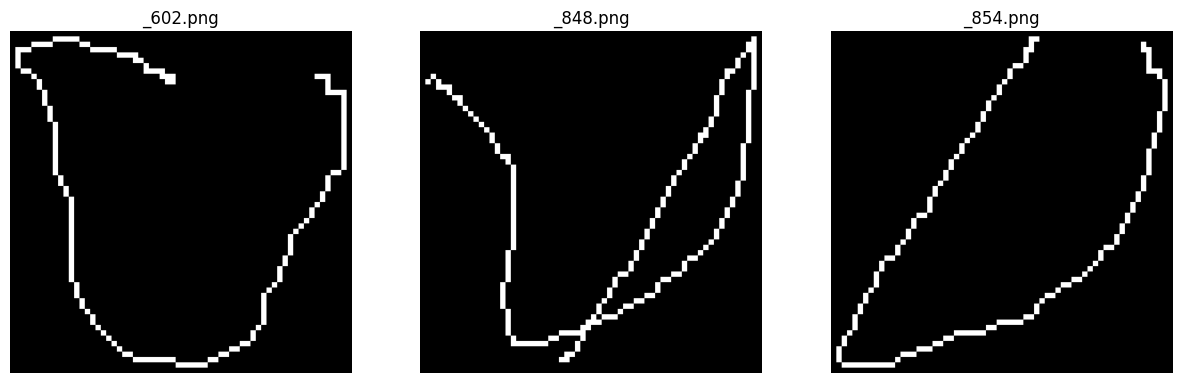

Label: 1


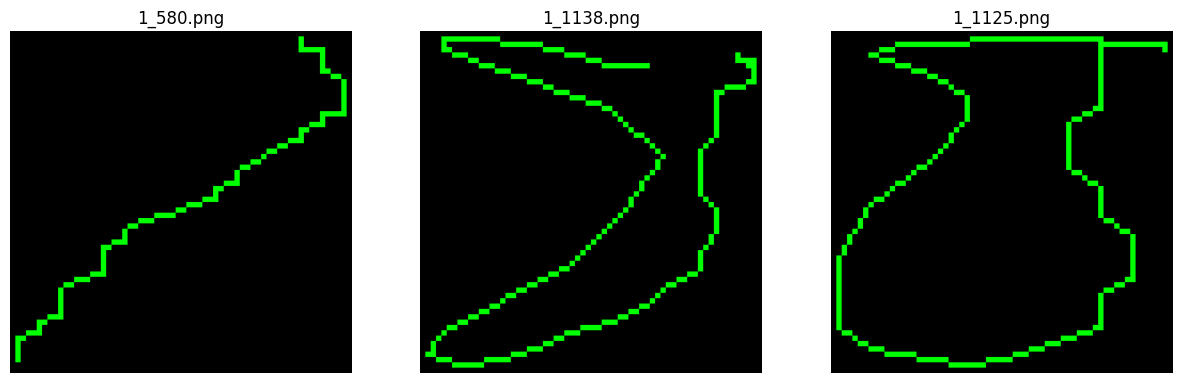

Label: 4


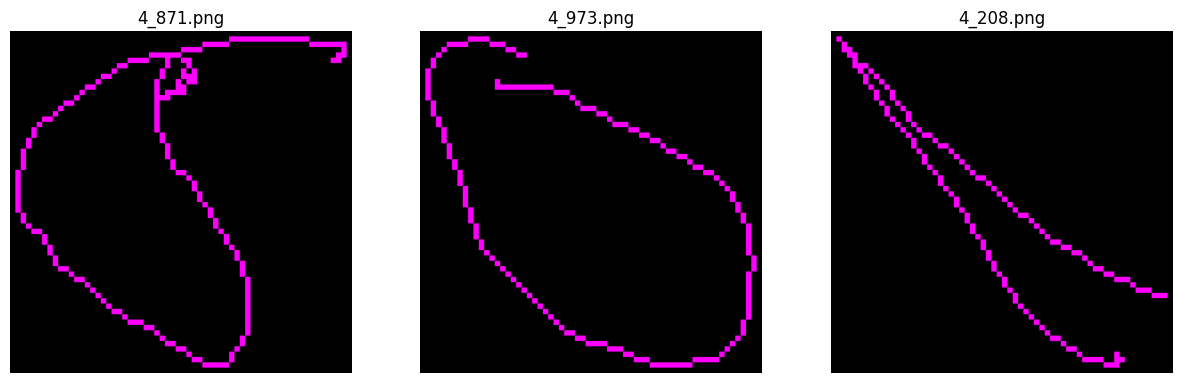

Label: 3


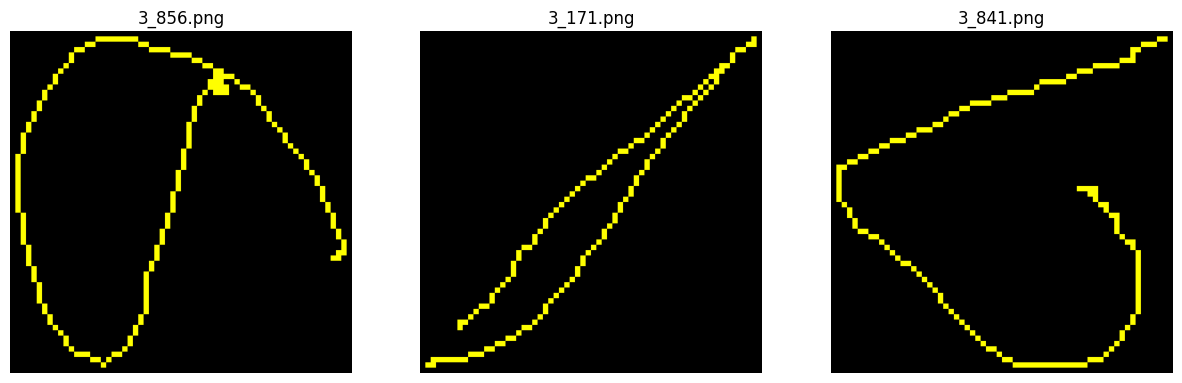

In [6]:
# Loads the image paths from the output directory, groups them by labels, 
# randomly selects only few images from each group to display.

import os
import random
import PIL.Image
import matplotlib.pyplot as plt

def display_sample_images(output_dir, samples_per_label=3):
    # Dictionary to hold image paths categorized by labels
    images_by_label = {}

    # Collect images into the dictionary
    for filename in os.listdir(output_dir):
        if filename.endswith(".png"):
            label = filename.split('_')[0]  # Assuming label is part of the filename before '_'
            if label not in images_by_label:
                images_by_label[label] = []
            images_by_label[label].append(os.path.join(output_dir, filename))

    # Display a sample of images for each label
    for label, paths in images_by_label.items():
        print(f"Label: {label}")
        sample_paths = random.sample(paths, min(samples_per_label, len(paths)))  # Get random samples
        fig, axs = plt.subplots(1, len(sample_paths), figsize=(15, 5))
        for ax, path in zip(axs, sample_paths):
            img = PIL.Image.open(path)
            ax.imshow(img)
            ax.axis('off')  # Hide the axes
            ax.set_title(os.path.basename(path))
        plt.show()

# Example usage
output_dir = '/Users/nely/Desktop/TinyML/Project/Output/'
display_sample_images(output_dir)



In [7]:
import os

# Directory where images are stored
output_dir = '/Users/nely/Desktop/TinyML/Project/Output/'

# Function to count files
def count_files(directory):
    # List all files in the directory with a specific extension
    files = [file for file in os.listdir(directory) if file.endswith('.png')]
    return len(files)

# Call the function and print the result
num_files = count_files(output_dir)
print(f"There are {num_files} rasterized gesture images in the directory.")


There are 1978 rasterized gesture images in the directory.
